# Driver Alertness Detection

**Driving when inattentive can be fatal. Using information gathered while driving, the goal is to create a classifier that can determine if a driver is alert or not.**




**Objective:**

This project's goal is to create a detector/classifier that can determine if a driver is alert or not by using any combination of physiological, environmental, and vehicle data collected while on the road.

# **Importing Libraries And Dataset**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
!pip install jovian

In [99]:
!pip install ydata-profiling

In [100]:
from ydata_profiling import ProfileReport

In [4]:
import jovian
jovian.commit(project='Course Project - Real-World Machine Learning Model', privacy='secret')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
training_data=pd.read_csv("/content/drive/MyDrive/dataset/stay Alert The Ford Challenge/fordTrain.csv")

In [5]:
testing_data=pd.read_csv("/content/drive/MyDrive/dataset/stay Alert The Ford Challenge/fordTest.csv")

In [6]:
testing_data.shape

(120840, 33)

In [10]:
training_data.shape

(604329, 33)

In [11]:
training_data.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


0-->if the driver is not alert

1-->if the driver is alert


 P1, P2 , …….., P8 --> represent physiological data

  E1, E2, …….., E11 -->  represent environmental data

  V1, V2, …….., V11 --> represent vehicular  data

In [12]:
data = training_data

In [13]:
data.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [102]:

pf = ProfileReport(data)
pf.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As "TrialID", "ObsNum" does not contribute in our model development. So we are going to drop them


In [14]:
data.drop(["TrialID", "ObsNum"], axis=1, inplace=True)

In [15]:
print("There are total of {} different features.".format(len(data.drop("IsAlert", axis=1).columns)))


There are total of 30 different features.


In [16]:
data.isnull().sum()

,0
IsAlert,0
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0
E1,0


# **EDA**

**Univariate & Bivariate Analysis**


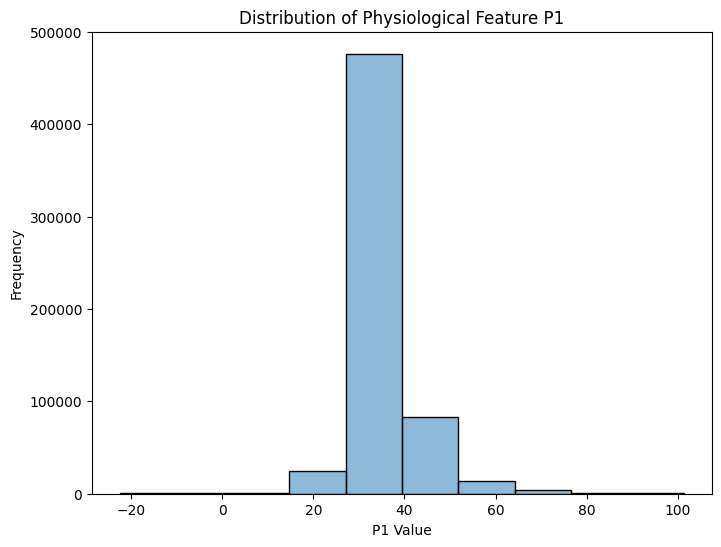

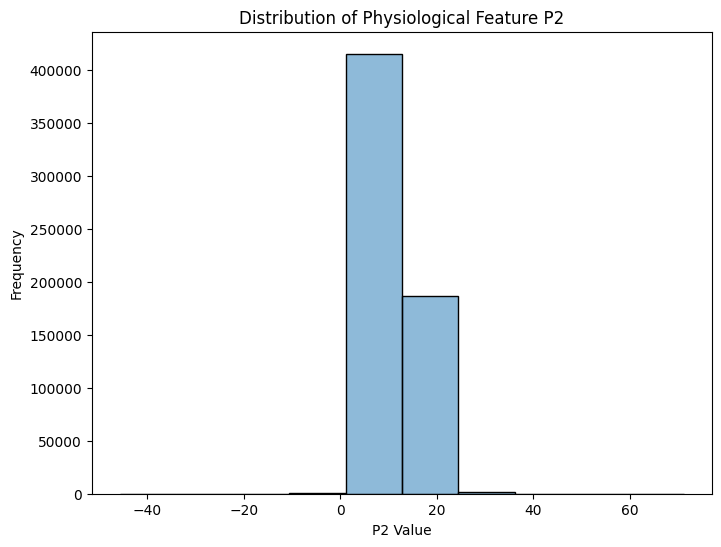

In [17]:
# Histogram of P1

plt.figure(figsize=(8, 6))
sns.histplot(data["P1"], bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P1")
plt.xlabel("P1 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the physiological feature P1. It indicates the number of observations that fall within each bin of P1 values.

# Histogram of P2

plt.figure(figsize=(8, 6))
sns.histplot(data["P2"], bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P2")
plt.xlabel("P2 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the physiological feature P2. It indicates the number of observations that fall within each bin of P2 values.

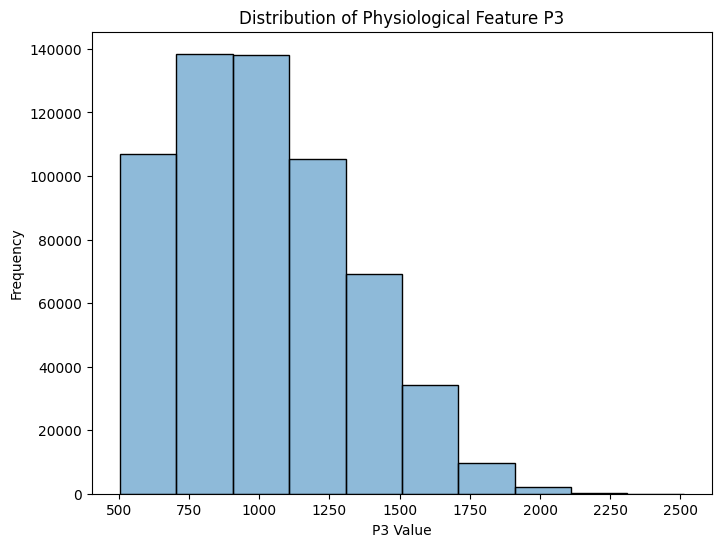

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data["P3"], bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P3")
plt.xlabel("P3 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the physiological feature P3. It indicates the number of observations that fall within each bin of P3 values.

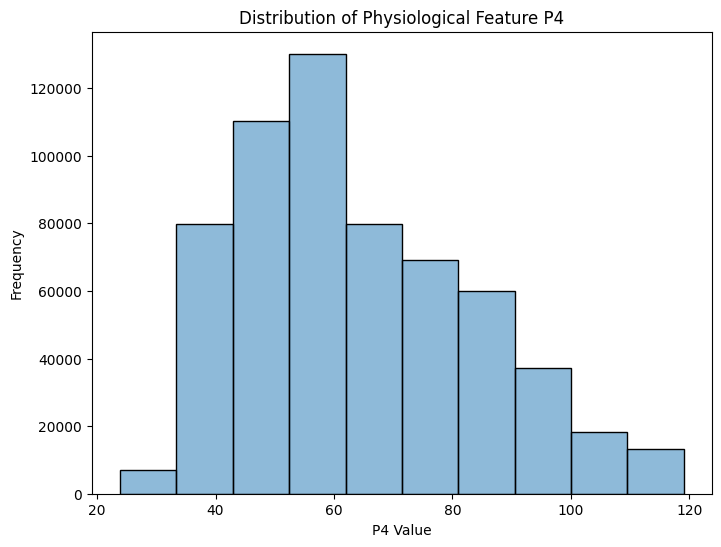

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data["P4"], bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P4")
plt.xlabel("P4 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the physiological feature P4. It indicates the number of observations that fall within each bin of P4 values.

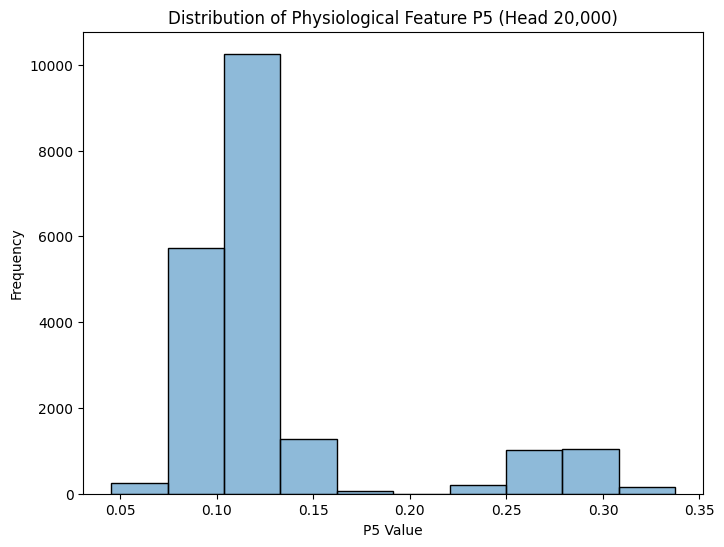

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data["P5"].head(20_000), bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P5 (Head 20,000)")
plt.xlabel("P5 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the first 20,000 observations of the physiological feature P5. It provides a closer look at the distribution in the lower range of P5 values.

**From the above , we can state that the values which are above 0.20 are outliers for the feature P5. So we can drop the value which are above 0.20**

Reason for Filtering:

The reason for filtering the data based on P5 is not explicitly stated in the provided code. However, it is possible that the user wants to focus on a specific subset of the data for further analysis. For example, the user might be interested in understanding the characteristics of drivers with P5 values below a certain threshold.

In [21]:
ftr = data["P5"] < 0.20
data = data[ftr]
data.head()

,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,0,17.807,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,0,17.807,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,0,17.807,...,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144


(459940, 31)


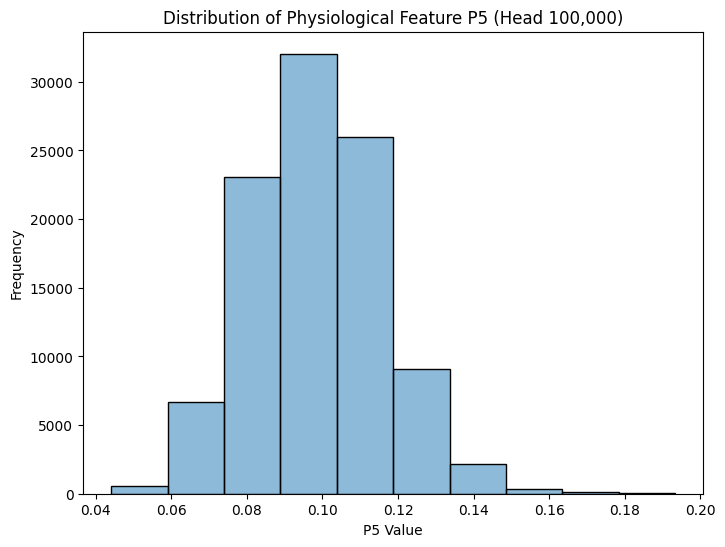

In [22]:
# Print the shape of the data after filtering

print(data.shape)

# Explanation: This prints the number of rows and columns in the data after applying the filter based on P5. It helps to understand the size of the filtered dataset.

# Histogram of P5 (Head 100,000):

plt.figure(figsize=(8, 6))
sns.histplot(data["P5"].head(100_000), bins=10, alpha=0.5)
plt.title("Distribution of Physiological Feature P5 (Head 100,000)")
plt.xlabel("P5 Value")
plt.ylabel("Frequency")
plt.show()

# Explanation: This histogram shows the distribution of values for the first 100,000 observations of the physiological feature P5 in the filtered data. It provides a more detailed view of the distribution compared to the previous histogram with only 20,000 observations.




By comparing the histogram before and after filtering, we can observe the effect of filtering on the distribution of P5 values. We can see how many observations were removed by the filter and how the distribution of the remaining data has changed. This information can help us understand the characteristics of the filtered dataset and how it differs from the original dataset.

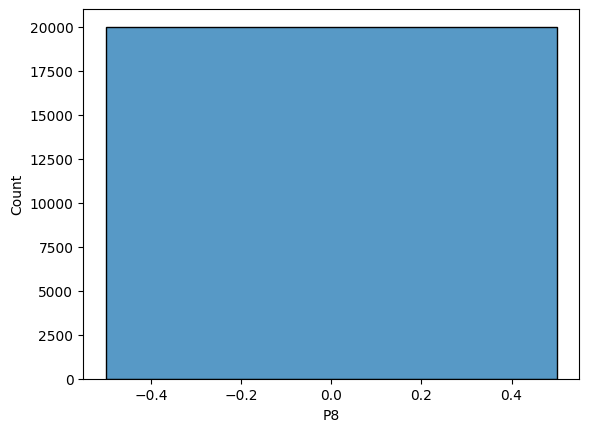

In [23]:
sns.histplot(data["P8"].head(20_000))
plt.show()

**The above plot show's that the value of P8 is always zero. Therefore we will drop it**

In [24]:
data = data.drop("P8", axis=1)

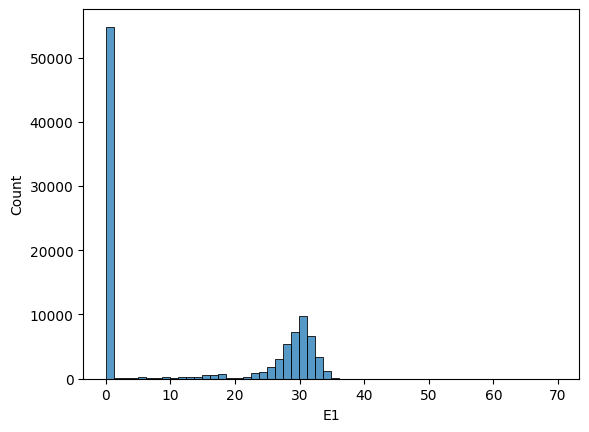

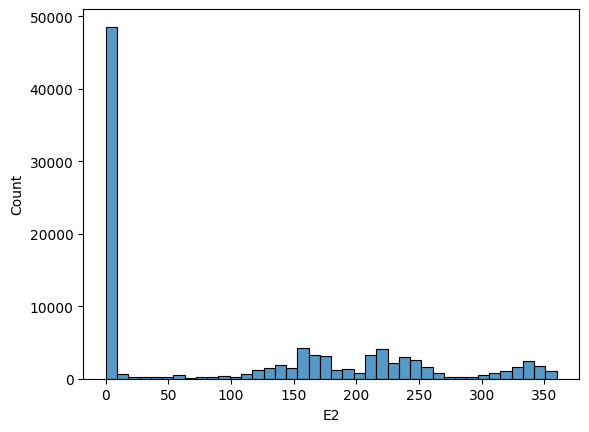

In [25]:
sns.histplot(data["E1"].head(100_000))
plt.show()
sns.histplot(data["E2"].head(100_000))
plt.show()

**E1 and E2 have a very unusual distribution**

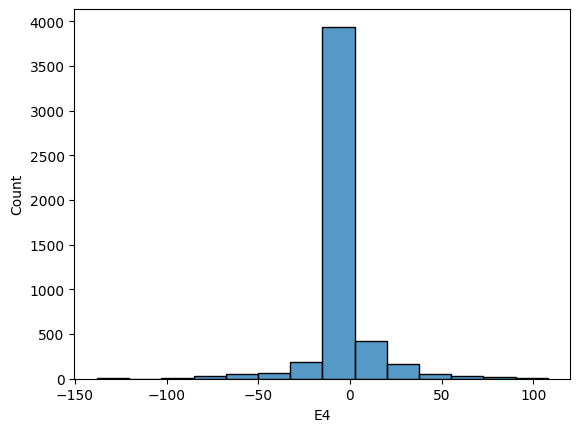

In [26]:
sns.histplot(data["E4"].head(5000))
plt.show()

**We can see, that there are outliers before and after -100 and 100 respectively. Therefore, I shall drop them**


In [27]:
print("Values of E4 that are less than -100")
data[data["E4"] < -100]

Values of E4 that are less than -100


,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
2237,1,37.9968,19.51430,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3235
2238,1,38.2023,8.02324,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.385,767,0.0000,0,1812,0,0.0,0,4,16.3350
2239,1,38.3385,15.28020,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3348
2240,1,38.4348,10.24090,1304,46.0123,0.105083,680,88.2353,0.000,0.000,...,-0.280,1023,0.0000,0,1813,0,0.0,0,4,16.3658
2732,0,37.7374,9.16250,1524,39.3701,0.108975,664,90.3614,18.516,209.480,...,0.000,752,10.5000,0,2161,0,29.9,0,1,16.6843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603651,1,40.0090,10.30960,680,88.2353,0.120651,600,100.0000,23.841,341.441,...,-2.135,1023,28.4812,1,1306,0,0.0,0,4,17.0335
603652,1,40.1742,17.54930,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0741
603653,1,40.3089,9.76309,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.135,767,28.4812,1,1287,0,0.0,0,4,17.0846
603654,1,40.4124,15.31680,1428,42.0168,0.101191,604,99.3377,23.841,341.441,...,-2.415,255,28.4812,1,1276,0,0.0,0,4,17.0867


In [28]:
fltr = data["E4"] < -100
data = data.drop(data[fltr].index, axis=0)

In [29]:
fltr = data["E4"] > 100
data = data.drop(data[fltr].index, axis=0)

In [30]:
data.sample(10)

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
37242,1,33.9754,8.94366,1464,40.9836,0.112867,696,86.2069,0.000,0.000,...,0.000,240,4.50625,0,2137,0,25.0,0,4,16.36160
284599,1,30.9646,12.35590,912,65.7895,0.099894,600,100.0000,31.676,210.359,...,0.175,752,3.01875,0,2289,0,20.6,0,4,10.51190
486235,1,32.9202,5.23901,1700,35.2941,0.105083,800,75.0000,0.000,0.000,...,-0.070,240,0.00000,0,627,0,0.0,0,1,15.63430
97830,1,33.9293,16.24140,720,83.3333,0.092110,868,69.1244,27.014,1.494,...,0.175,496,7.48125,0,2001,0,24.7,0,4,7.42469
566624,0,33.7692,23.51670,956,62.7615,0.120651,800,75.0000,0.000,0.000,...,0.280,1008,5.99375,0,2126,0,22.8,0,4,10.60340
547895,0,34.5652,10.91890,940,63.8298,0.131030,852,70.4225,31.987,141.344,...,-0.070,496,1.48750,0,2214,0,0.0,0,4,11.17610
195704,1,32.9088,9.07375,516,116.2790,0.099894,1024,58.5938,30.031,147.501,...,0.000,255,4.50625,0,2086,0,19.9,0,4,7.95641
183622,0,30.1403,10.73880,1068,56.1798,0.102489,1012,59.2885,28.773,243.713,...,0.280,1008,5.99375,0,2086,0,14.9,0,4,9.58085
459507,1,33.0645,7.69030,864,69.4444,0.105083,592,101.3510,0.000,0.000,...,-0.070,255,0.00000,1,785,0,0.0,0,1,10.39690
21070,1,37.3627,8.29377,900,66.6667,0.114165,632,94.9367,0.000,0.000,...,0.175,1008,4.50625,0,2373,0,24.3,0,4,16.53010


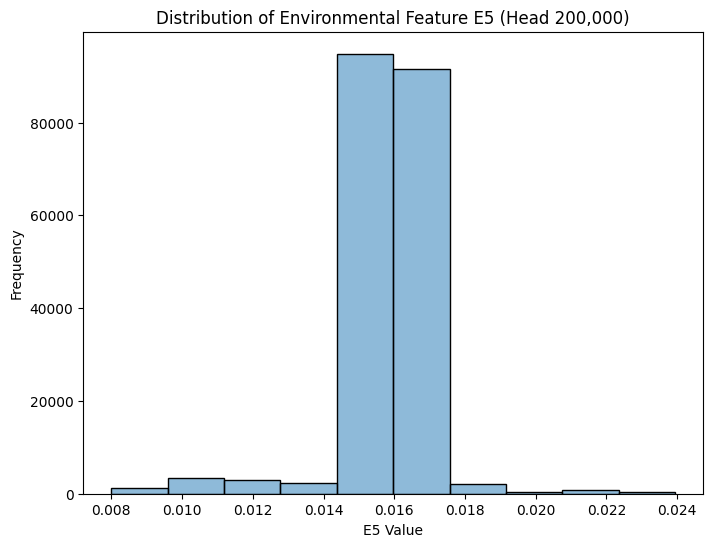

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data["E5"].head(200_000), bins=10, alpha=0.5)
plt.title("Distribution of Environmental Feature E5 (Head 200,000)")
plt.xlabel("E5 Value")
plt.ylabel("Frequency")
plt.show()

**Dropping the outliers before 0.012 and after 0.020**

In [32]:
fltr = data["E5"] < 0.012
data = data.drop(data[fltr].index, axis=0)

In [33]:
fltr = data["E5"] > 0.020
data = data.drop(data[fltr].index, axis=0)

In [34]:
data

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1211,1,32.1488,10.93640,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8272
1212,1,32.1517,14.58850,800,75.0000,0.081731,692,86.7052,17.807,222.11,...,0.280,240,3.01875,0,1795,0,31.3,0,4,15.8310
1213,1,32.1948,7.98345,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8282
1214,1,32.2114,10.56740,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.070,240,3.01875,0,1790,0,32.1,0,4,15.8267
1215,1,32.2197,12.64030,908,66.0793,0.128435,692,86.7052,17.807,222.11,...,0.175,240,3.01875,0,1789,0,32.6,0,4,15.8144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


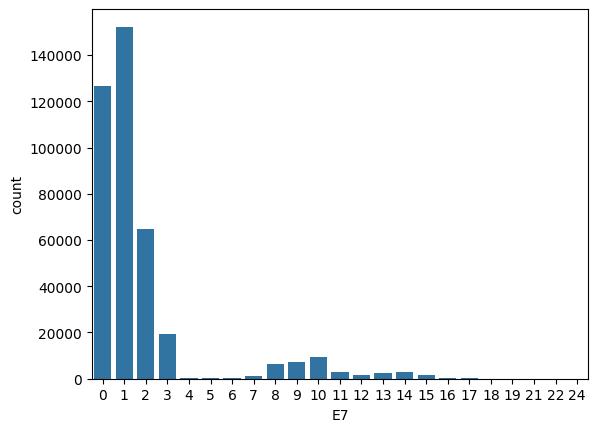

In [35]:
sns.countplot(x = data["E7"])
plt.show()

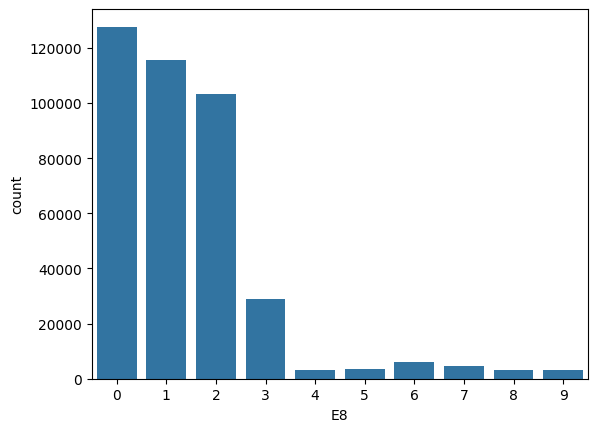

In [36]:
sns.countplot(x = data["E8"])
plt.show()

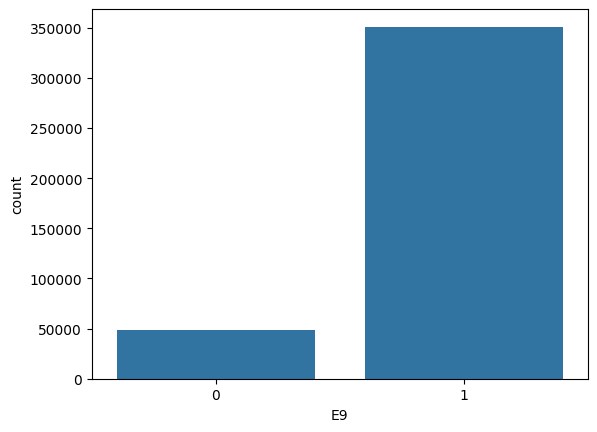

In [37]:
sns.countplot(x = data["E9"])
plt.show()

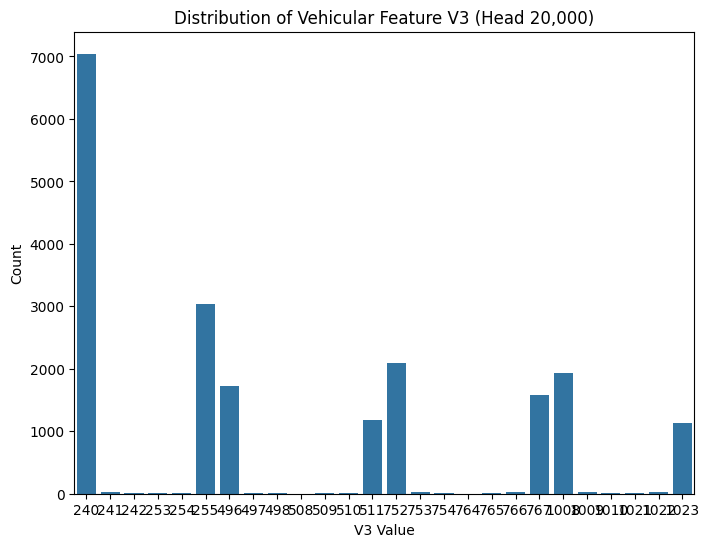

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data["V3"].head(20000))
plt.title("Distribution of Vehicular Feature V3 (Head 20,000)")
plt.xlabel("V3 Value")
plt.ylabel("Count")
plt.show()

# Explanation: This countplot shows the frequency of occurrence for each distinct value of the vehicular feature V3 in the first 20,000 observations of the filtered data.


In [39]:
data["V7"].value_counts()

,count
V7,
0,399842


In [40]:
data = data.drop("V7", axis=1)

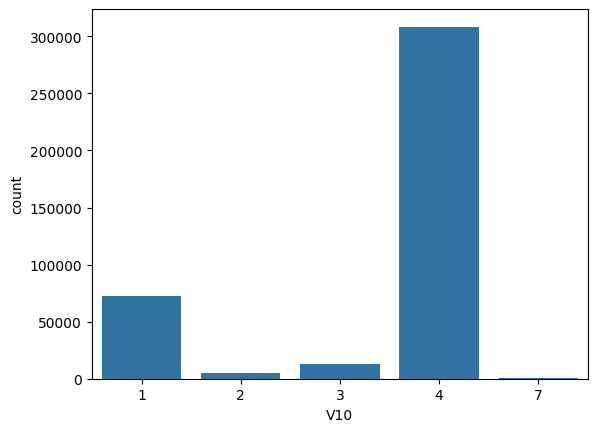

In [41]:
sns.countplot(x=data["V10"])
plt.show()

In [42]:
data["V9"].value_counts()


,count
V9,
0,399842


In [43]:
data = data.drop("V9", axis=1)

**Correlation Matrix for all the features that are existing in the dataset after EDA**

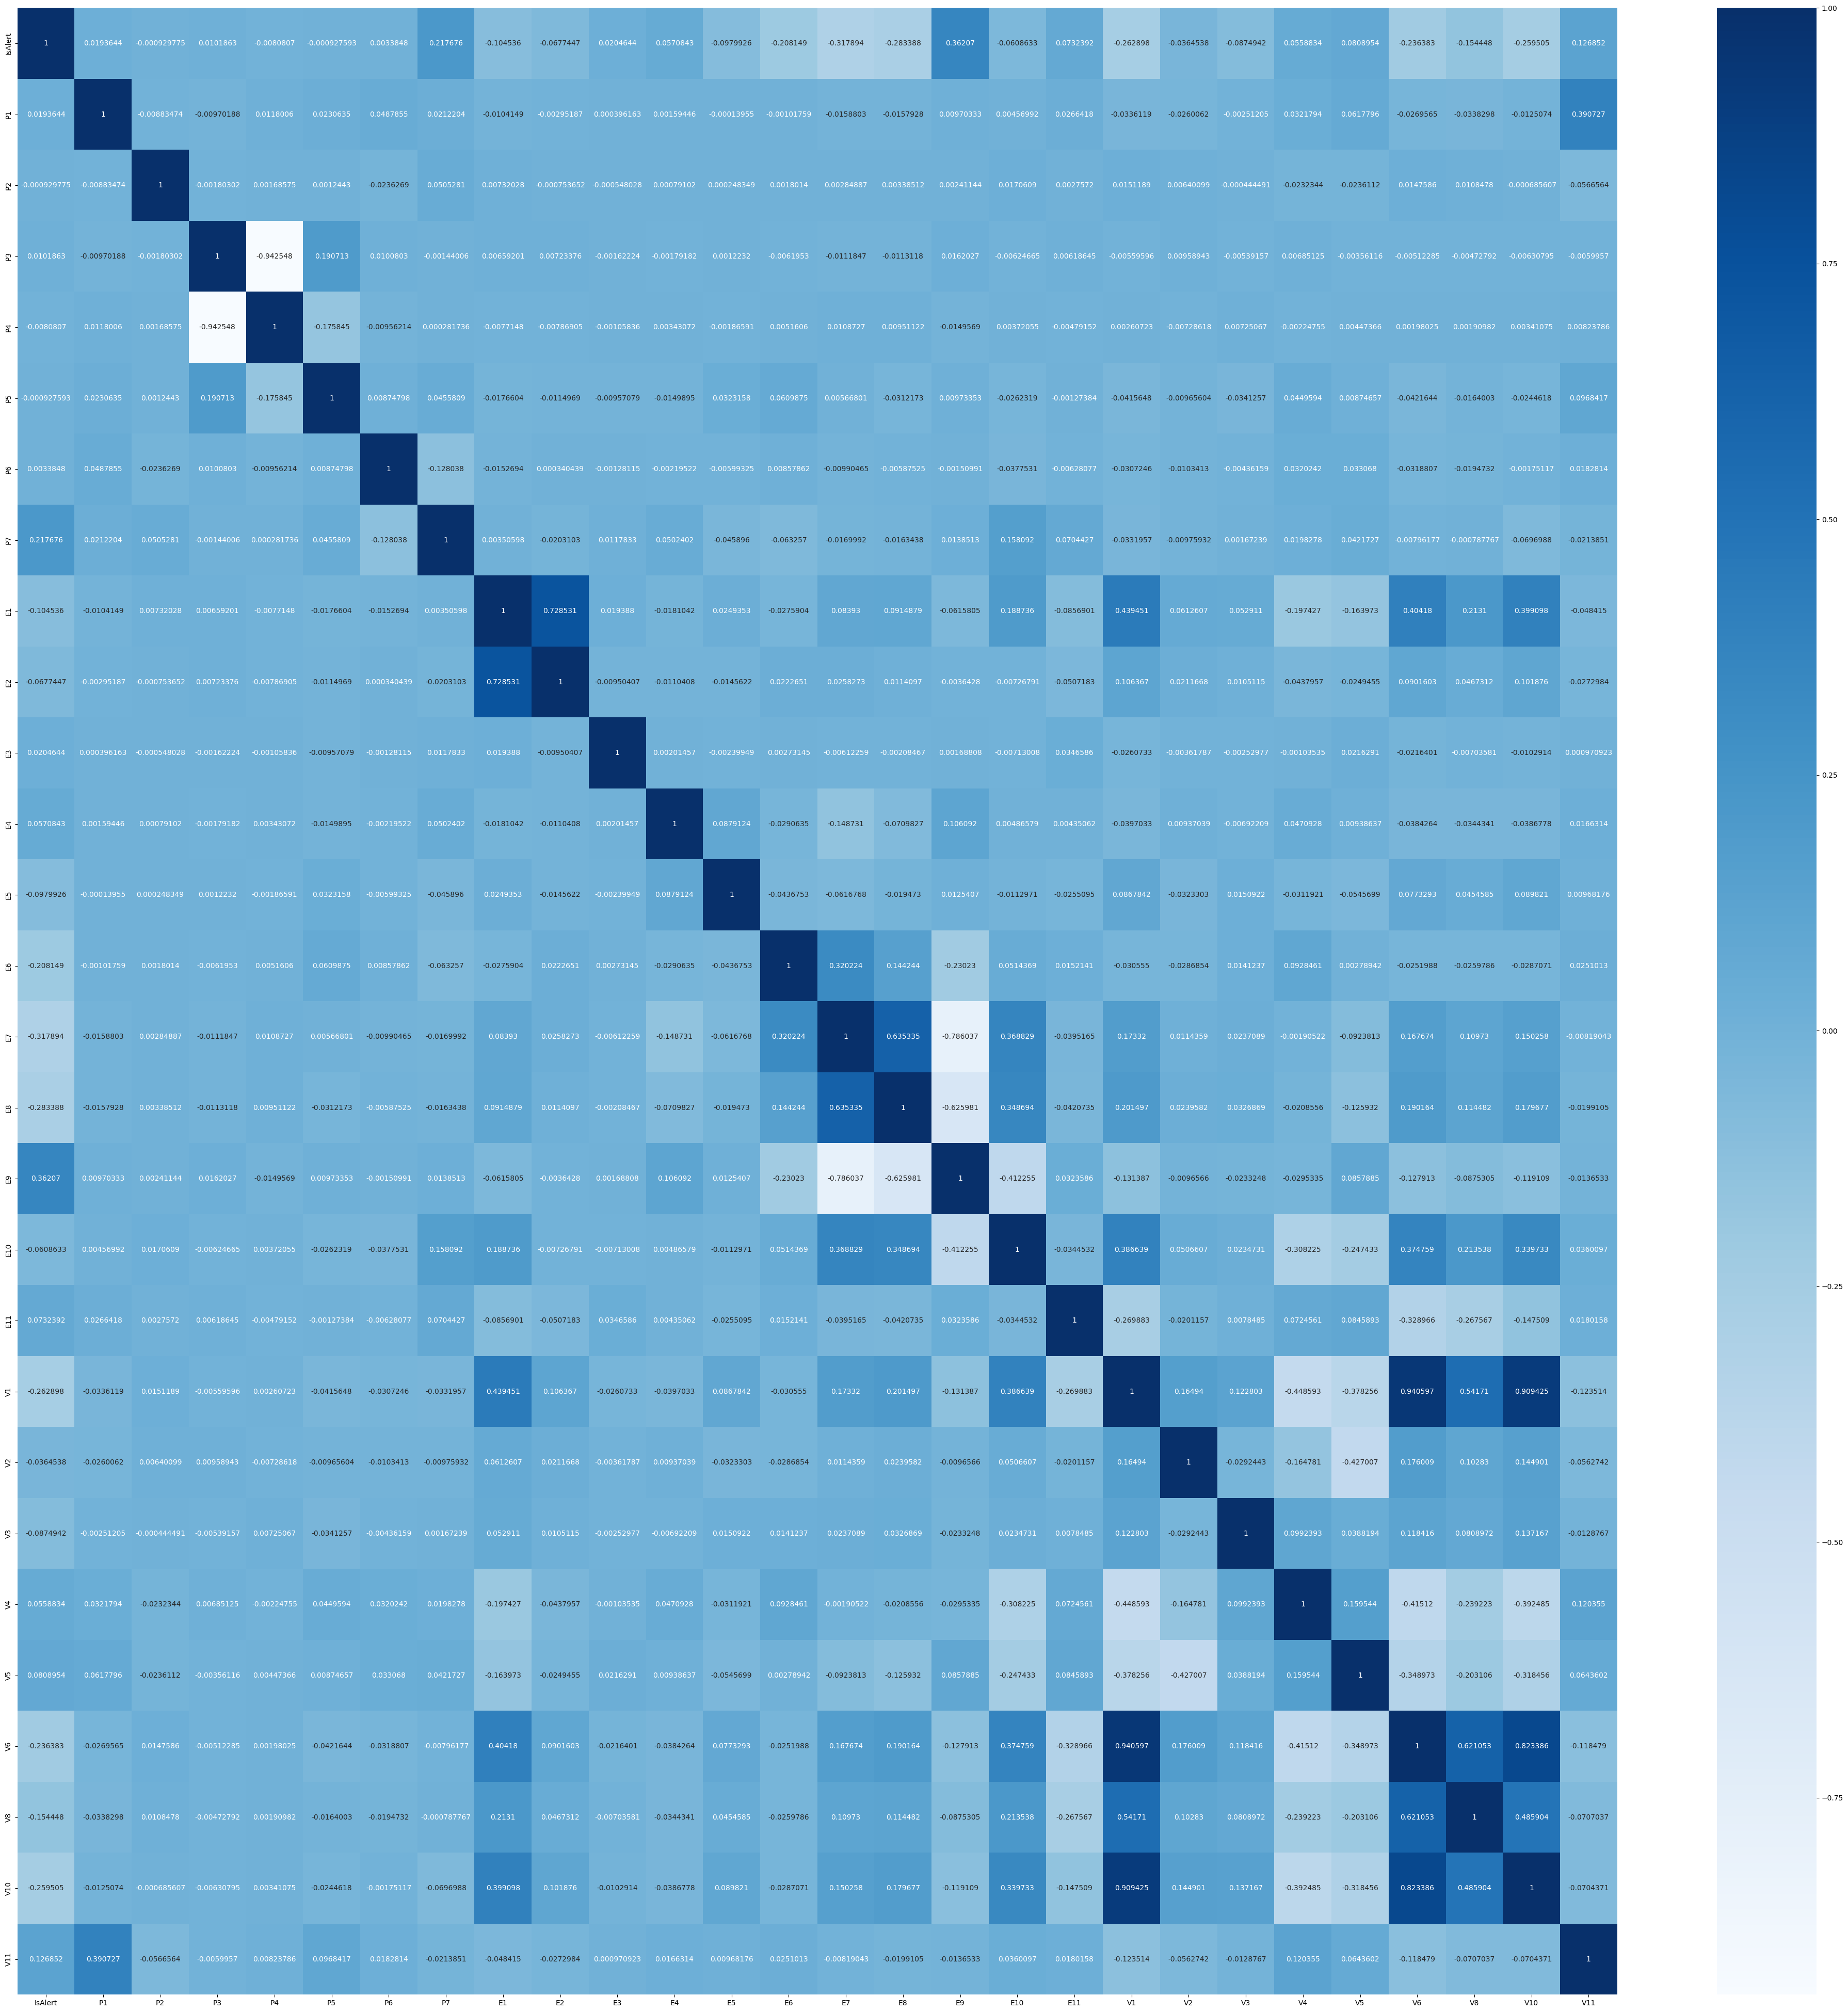

In [44]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='g', ax=ax)
plt.show()

In [45]:
numerical = [feature for feature in data.columns if data[feature].dtype in ['int64', 'float64']]
df = data[numerical]

**the above graph represents that the data is skewed**

# **Feature Engineering**

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [108]:
y = data["IsAlert"]

In [109]:
cols = list(data.columns)
cols.remove("IsAlert")
X = data[cols]

In [49]:
new = scaler.fit_transform(X)

In [110]:

df = pd.concat([X, y], axis=1)

# Generate the profiling report
pf = ProfileReport(df)

# Save the report to an HTML file
pf.to_file('finalreport.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Model Building**

Logistic Regression

****

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.*LogisticRegression*)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression().fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Purpose: Creates an instance of LogisticRegression and fits it to the data X (features) and y (target).

Reason: Fitting the model involves finding the best parameters that minimize the error in predicting the target variable.

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new,y)

Function is used to split the dataset into training and testing sets, which is essential for evaluating the model's performance on unseen data.

By splitting the data, we can train the model on one subset (training) and test its performance on another (testing), which helps prevent overfitting and assess generalization.

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

Purpose: Fits the previously defined logistic regression model to the training data.

Reason: After splitting the data, we need to refit the model to the training data to ensure it learns from this subset.

In [54]:
#This function computes the accuracy of the model, which is the ratio of correctly predicted instances to the total instances.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.7655485639399365

Purpose: Predicts the target for the test data and computes the accuracy score.

Reason: Evaluating the model on the test data gives an indication of its performance on unseen data.

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

Reason: Decision Tree is a versatile classification algorithm that splits data into branches to make predictions.


In [56]:
model2=DecisionTreeClassifier().fit(X,y)

In [57]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model2.predict(X_test))

0.986834865597583

**Random Forests**

In [59]:
from sklearn.ensemble import RandomForestRegressor

Random Forest is an ensemble learning method that improves performance by combining multiple decision trees.

In [60]:
model3=RandomForestRegressor(random_state=42, n_jobs=-1)

Purpose: Creates an instance of RandomForestRegressor with specified parameters.

random_state=42 ensures reproducibility by fixing the random seed.

n_jobs=-1 allows the use of all available CPU cores for parallel processing.

Reason: These parameters help in achieving consistent results and faster computation.

In [61]:
model3.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# **Hyperparameter**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
# Parameter Grid for LogisticRegression
lr_param_grid = {
    "fit_intercept": [True, False],
    "max_iter"     : [100, 1000, 10_000],
    "tol"          : [0.0001, 0.001]
}

# Parameter Grid for GradientBoostingClassifier
gb_param_grid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "random_state": [i for i in range(1, 6)]
}

lr_hp = LogisticRegression()
gb_hp = GradientBoostingClassifier()

lr_clf = RandomizedSearchCV(lr_hp, lr_param_grid)
gb_clf = RandomizedSearchCV(gb_hp, gb_param_grid)

In [65]:
search_lr = lr_clf.fit(X_train[:60_000], y_train[:60_000])

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, search_lr.predict(X_test))

0.766298856554056

In [67]:
search_gb = gb_clf.fit(X_train[:1000], y_train[:1000])

In [68]:
accuracy_score(y_test, search_gb.predict(X_test))

0.8445593781574814

In [69]:
print(f"Logistic Regressor's best params: {search_lr.best_params_}")
print(f"Gradient Boosting Classifier's best params: {search_gb.best_params_}")

Logistic Regressor's best params: {'tol': 0.0001, 'max_iter': 100, 'fit_intercept': False}
Gradient Boosting Classifier's best params: {'random_state': 2, 'learning_rate': 0.1}


In [70]:
import jovian

In [71]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming 'model' is your trained model (e.g., search_gb or search_lr)
y_pred = model.predict(X_test)  # This line is added to predict and assign to y_pred

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7655485639399365
Precision: 0.7564415918801426
Recall: 0.7961315660284732
F1 Score: 0.7757792617822086
Confusion Matrix:
 [[35982 13054]
 [10382 40543]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75     49036
           1       0.76      0.80      0.78     50925

    accuracy                           0.77     99961
   macro avg       0.77      0.76      0.77     99961
weighted avg       0.77      0.77      0.77     99961



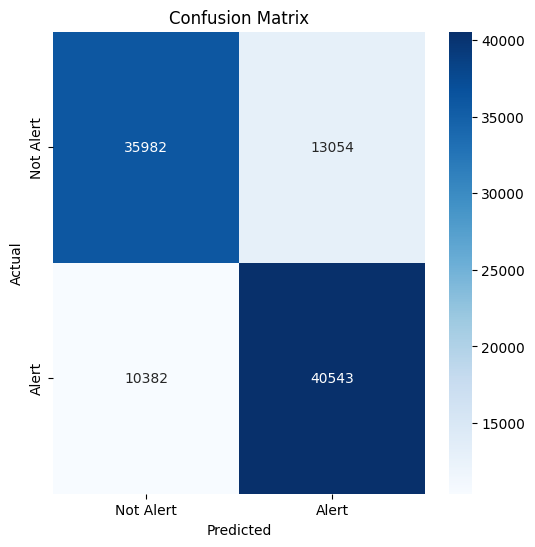

In [75]:


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Alert", "Alert"], yticklabels=["Not Alert", "Alert"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Local Deployment Testing

In [82]:
# Streamlit Deployment Code for Driver Alertness Detection

# Step 1: Install necessary libraries
!pip install streamlit
!pip install pyngrok

# Step 2: Write the Streamlit application code
import os



# Write the Streamlit app code to a Python file
with open('app.py', 'w') as f:
    f.write(streamlit_app_code)

# Step 3: Save the trained model
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np

# Example dataset
X = np.random.rand(100, 3)  # Example features
y = np.random.randint(2, size=100)  # Example target labels

# Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Save the model to a file
pickle.dump(model, open('driver_alertness_model.pkl', 'wb'))




In [85]:
# Create a Streamlit app script

import streamlit as st
import pickle
import numpy as np

# Title of the application
st.title("Driver Alertness Detection")

# Sidebar for user input
st.sidebar.header("User Input Features")

def user_input_features():
    physiological = st.sidebar.slider("Physiological Signal", 0, 100, 50)
    environmental = st.sidebar.slider("Environmental Factor", 0, 100, 50)
    vehicle_data = st.sidebar.slider("Vehicle Data", 0, 100, 50)

    data = {
        'physiological': physiological,
        'environmental': environmental,
        'vehicle_data': vehicle_data
    }
    return data

input_data = user_input_features()

# Convert user input to a DataFrame
import pandas as pd
input_df = pd.DataFrame([input_data])

st.write("### Input Data:", input_df)

# Load the pre-trained model
model_file = 'driver_alertness_model.pkl'
try:
    model = pickle.load(open(model_file, 'rb'))

    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    # Display prediction
    st.subheader("Prediction")
    result = "Alert" if prediction[0] == 1 else "Not Alert"
    st.write(result)

    st.subheader("Prediction Probability")
    st.write(prediction_proba)

except FileNotFoundError:
    st.error(f"Model file '{model_file}' not found. Please ensure the model is available.")

2024-12-14 09:49:11.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-14 09:49:11.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [86]:
def launch_streamlit():
    print("Starting Streamlit app...")
    os.system('streamlit run app.py')

launch_streamlit()

Starting Streamlit app...


In [87]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 4s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [88]:
!apt-get install nodejs npm


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js libjs-inherits
  libjs-is-typedarray libjs-psl libjs-source-map libjs-sprintf-js libjs-typedarray-to-buffer
  libnode-dev libnode72 libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy node-are-we-there-yet
  node-argparse node-arrify node-asap node-asynckit node-balanced-match node-brace-expansion
  node-builtins node-cacache node-chalk node-chownr node-clean-yaml-object node-cli-table
  node-clone node-color-convert node-color-name node-colors node-columnify node-combined-stream
  node-commander node-console-control-strings node-copy-concurrently node-core-util-is
  node-coveralls node-cssom node-cssstyle node-debug node-decompress-response node-defaults
  node-delayed-stream n

In [89]:
!streamlit run app.py &>/content/logs.txt &


# Documentation


**Summary and References**

**Topics Covered**

* Downloading dataset
* Preparing a dataset for training
* Exploratory Data Analysis
* Model Building and Training

**Non-Hyperparameter Tuned Models**

* Decision Tree Classifier - Accuracy: 98.7%





* Logistic Regressor - Accuracy: 76.4 %

**Hyperparameter Tuned Models**

* Logistic Regressor - Accuracy: 76.7%



* Gradient Boosting Classifier - Accuracy: 84.9%

**Future Work And Ideas**

* In order to increase my accuracy, I would like to work on the gradient boosting and decision tree classifiers.


* Investigate several algorithms, acquire knowledge about them, and attempt to incorporate them into my project.

* In order to understand how my model functions in the real world, I would like to explore several deployment strategies.


**Reference**



1.  https://jovian.com/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fstayalert

2.   http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

3. http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

5. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

6. https://scikit-learn.org/stable/modules/grid_search.html
